In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
import cymetric as cym
from cymetric import timeseries
import pandas as pd
import numpy as np
import sqlite3 as lite
import os
import sys 
sys.path.insert(0, '../../../../scripts/')
import output as oup
import functions as fn

In [2]:
starter_string = 'Press'
scenario_nums = ['100','232','364','496','628','760']

In [3]:
df_p = oup.initialize_df(scenario_index=starter_string,
                                 scenarios_nums=scenario_nums)

In [4]:
output_start = '../../../../cyclus-files/oat/pyre/ref-press/press'
cur_dict = {}
for x in range(len(scenario_nums)): 
    output_file = output_start + scenario_nums[x]+'.sqlite'
    cur_dict[scenario_nums[x]] = fn.get_cursor(output_file)

In [5]:
def isotope_total_cum(cur,num,in_dict):
    """ Find total isotopes present in each output stream 
    
    Parameters 
    ----------
    cur: sqlite cursor 
    num: nucid 
    
    Returns 
    -------

    """    
    
    streamlist = ["reprocess_waste","diverted"]
    isotope_total_list = []
    isotope_list = []
    isotope_ttal = 0 
    
    for stream in streamlist:    
        init_yr, init_month, duration, timestep = fn.get_timesteps(cur)
        isotopes = cur.execute('SELECT time, sum(quantity)*massfrac FROM transactions '
                               'INNER JOIN resources '
                               'ON transactions.resourceid = resources.resourceid '
                               'LEFT OUTER JOIN compositions '
                               'ON resources.qualid = compositions.qualid '
                               'WHERE Commodity =:stream AND nucid =:num ' # must specify isotope and stream
                               ' GROUP BY time ',{"stream": stream, "num":num}).fetchall()
        isotope_list = fn.get_timeseries(isotopes,duration,False)
        isotope_total = np.sum(isotope_list)
        isotope_total_list.append(isotope_total)
    
    name = num*0.0001
    in_dict[name] = isotope_total_list
    return in_dict

In [6]:
nucnum = [10030000,60140000,360860000,380900000,390900000,400950000,420950000,430990000,441010000,451030000,
461070000,471090000,521320000,531290000,541290000,551370000,561330000,571390000,581440000,591440000,601430000,
601450000,611470000,621470000,621490000,621500000,621510000,621520000,631530000,641550000,922340000,922350000,
922360000,922380000,932370000,942380000,942390000,942400000,942410000,942420000,952410000,952430000,962430000,
962440000,962450000]

In [7]:
dict_1 = {}
dict_2 = {}
dict_3 = {}
dict_4 = {}
dict_5 = {}
dict_6 = {}


for x in range(len(nucnum)):
    num = nucnum[x]
    dict_1 = isotope_total_cum(cur_dict[scenario_nums[0]],num,dict_1)
    
for x in range(len(nucnum)):
    num = nucnum[x]
    dict_2 = isotope_total_cum(cur_dict[scenario_nums[1]],num,dict_2)
    
for x in range(len(nucnum)):
    num = nucnum[x]
    dict_3 = isotope_total_cum(cur_dict[scenario_nums[2]],num,dict_3)
    
for x in range(len(nucnum)):
    num = nucnum[x]
    dict_4 = isotope_total_cum(cur_dict[scenario_nums[3]],num,dict_4)
    
for x in range(len(nucnum)):
    num = nucnum[x]
    dict_5 = isotope_total_cum(cur_dict[scenario_nums[4]],num,dict_5)
    
for x in range(len(nucnum)):
    num = nucnum[x]
    dict_6 = isotope_total_cum(cur_dict[scenario_nums[5]],num,dict_6)

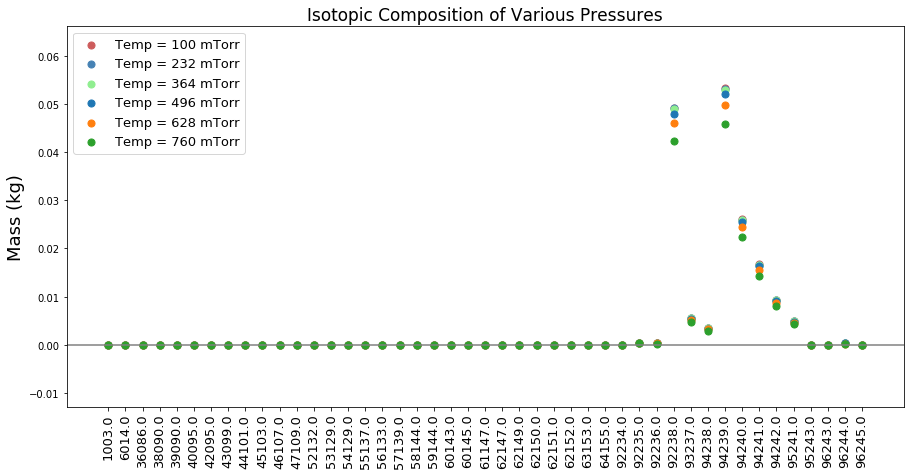

In [10]:
init_yr, init_month, duration, timestep = fn.get_timesteps(cur_dict[scenario_nums[0]])
key_list = list(dict_1.keys())
y_pos = np.arange(len(key_list))
w = 45
h = 6
stream_ = [[0 for x in range(w)] for y in range(h)]

z=1
n=0
for key in key_list:
    temp1 = list(dict_1[key])
    temp2 = list(dict_2[key])
    temp3 = list(dict_3[key])
    temp4 = list(dict_4[key])
    temp5 = list(dict_5[key])
    temp6 = list(dict_6[key])
    stream_[0][n] = temp1[z]
    stream_[1][n] = temp2[z]
    stream_[2][n] = temp3[z]
    stream_[3][n] = temp4[z]
    stream_[4][n] = temp5[z]
    stream_[5][n] = temp6[z]
    n = n+1
    
#plt.scatter(range(1,46),stream_[0])  

fig, ax = plt.subplots(figsize=(15,7))
plt.axhline(y=0,color='grey')
ax.scatter(range(0,45),stream_[0],color = 'indianred', label='Temp = 100 mTorr', marker = "o", s = 50)
ax.scatter(range(0,45),stream_[1],color = 'steelblue', label='Temp = 232 mTorr', marker = "o", s = 50)
ax.scatter(range(0,45),stream_[2],color = 'lightgreen', label='Temp = 364 mTorr', marker = "o", s = 50)
ax.scatter(range(0,45),stream_[3], label='Temp = 496 mTorr', marker = "o", s = 50)
ax.scatter(range(0,45),stream_[4], label='Temp = 628 mTorr', marker = "o", s = 50)
ax.scatter(range(0,45),stream_[5], label='Temp = 760 mTorr', marker = "o", s = 50)
box = ax.get_position()
ax.set_position([box.x0,box.y0 + box.height,box.width,box.height*1])
handles, labels = ax.get_legend_handles_labels()
plt.xticks(y_pos,key_list,rotation=90,fontsize=13)
ax.legend(handles, labels, fontsize=13,loc='upper left',fancybox=True)
ax.set_ylabel('Mass (kg)', fontsize=18)
ax.set_title('Isotopic Composition of Various Pressures' , fontsize=17)
plt.savefig('pressure-sa-comp.png', bbox_inches="tight")